# Test - Scientifique de données : Modélisation et Validation des modèles de risque de crédit

In [28]:
#Importation des packages de bases
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
#Changement du style/design des graphiques 
plt.style.available # La liste des styles de matplotlib, on sélectionera : [ggplot]
plt.style.use('seaborn-dark-palette')

In [30]:
#Importation de la base de données de Desjardins pour analyse et modélisation
credit_risk = pd.read_excel("credit_risk_dataset.xlsx")
#Affichage des 6 premières lignes de la base de données
credit_risk.head(6)

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   
5          21           9900                   OWN                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   
5     VENTURE          A       2500           7.14            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4  
5                 0.25                         N                           2

In [116]:
#Vérification de la dimension de la table
credit_risk.shape
print("La dimension de la base de données est :" + str(credit_risk.shape))

La dimension de la base de données est :(32581, 12)


In [117]:
# Vérification des valeurs manquantes dans la tableau des données
credit_risk.isnull().sum() # NaNs
print("person_emp_length:" + str(895), "valeurs manquantes", "loan_int_rate:" + str(3116), "valeurs manquantes")
print("Autres variables:" + str(0), "valeurs manquantes")

person_emp_length:895 valeurs manquantes loan_int_rate:3116 valeurs manquantes
Autres variables:0 valeurs manquantes


In [118]:
#Supprimer les valeurs manquantes de la table de données:
credit_risk = credit_risk.dropna(axis=0)
print("La nouvelle dimension de la table de données:" + str(credit_risk.shape))

La nouvelle dimension de la table de données:(28638, 12)


In [119]:
#Obtenir des informations sur les variables
credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


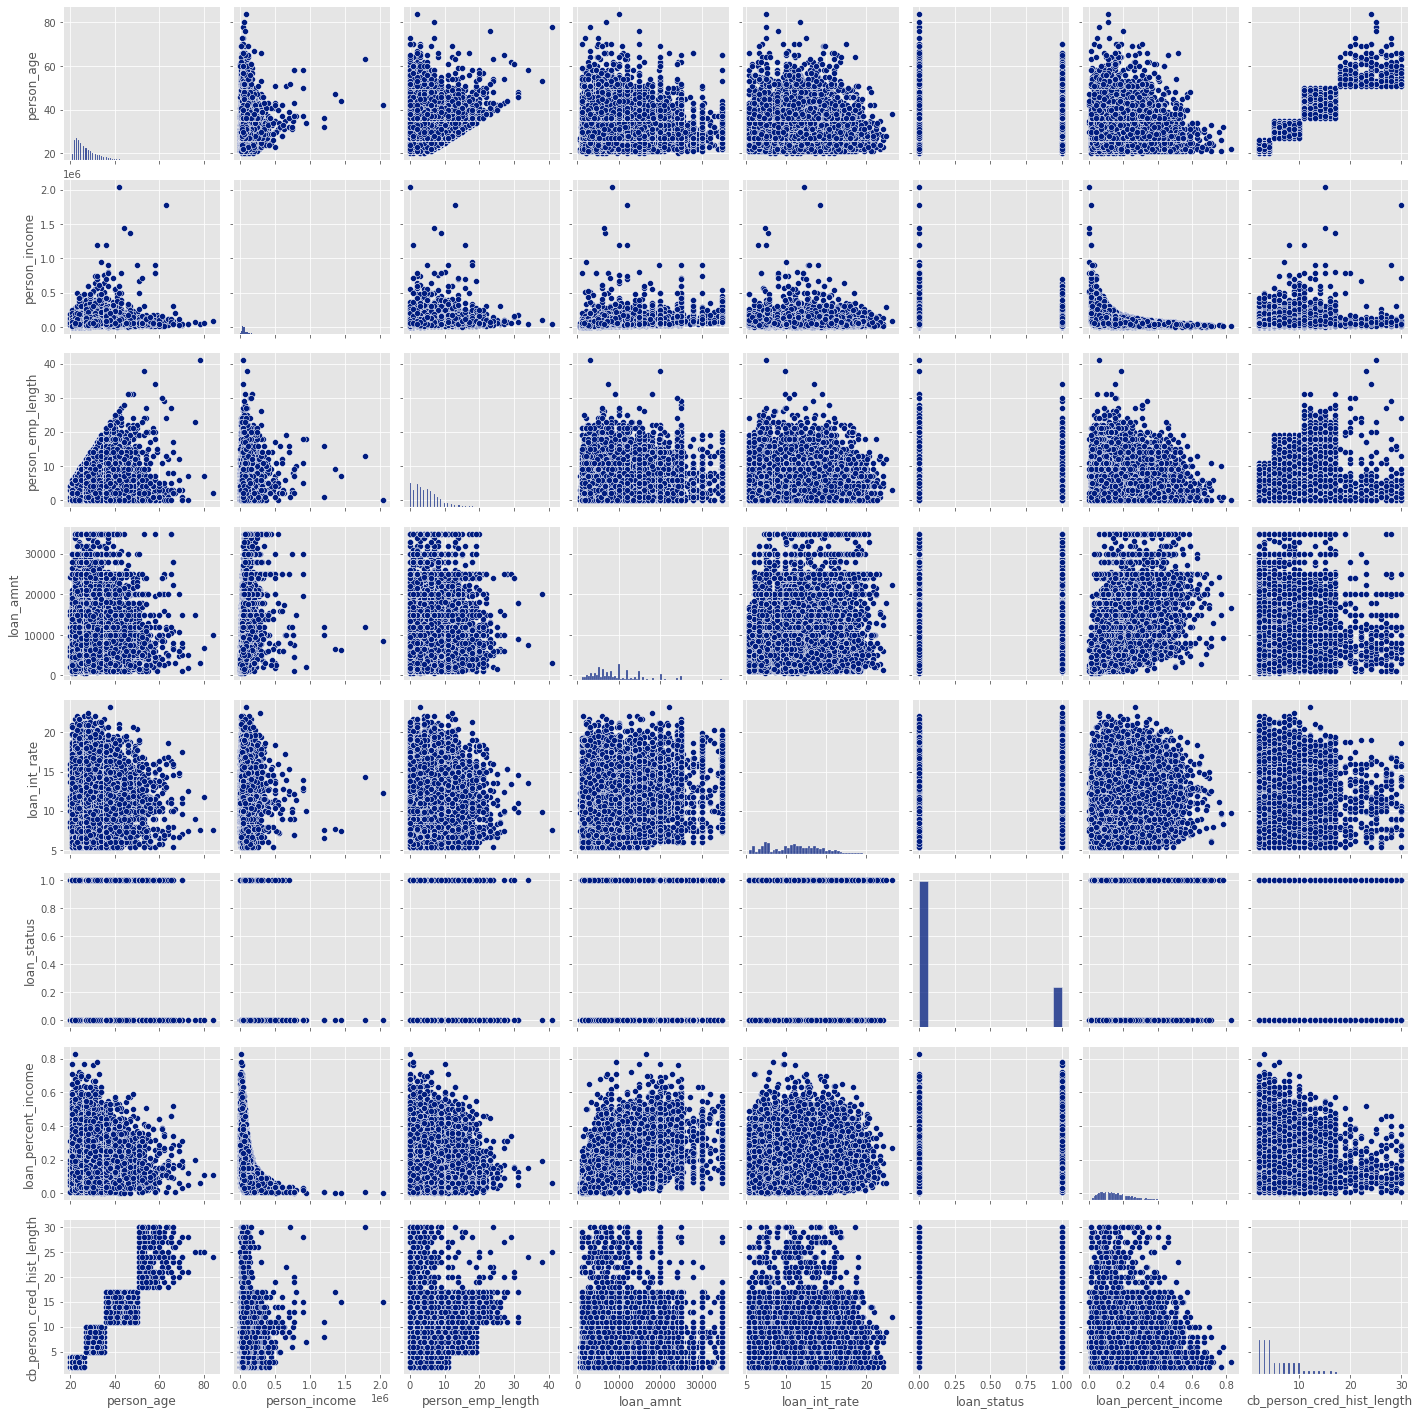

In [122]:
#Vérification des valeurs abérrantes et suppression 
ax = sns.pairplot(data = credit_risk)

In [121]:
#Suppression des valeurs aberrantes 
credit_risk = credit_risk[credit_risk["person_age"]<=100] 
credit_risk = credit_risk[credit_risk["person_emp_length"]<=100] 
credit_risk = credit_risk[credit_risk["person_income"]<= 4000000]
credit_risk.head()

person_age  person_income person_home_ownership  person_emp_length  \
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   
5          21           9900                   OWN                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   
5     VENTURE          A       2500           7.14            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4  
5                 0.25                         N                           2

In [50]:
# On souhaite afficher le salaire en fonction de l'age des personnes
# Créer une nouvelle base de données a partir des données d'origine puis faites l'analyse graphique
# OPTION 1
variable_1 = credit_risk[['person_age', 'person_income']]
# OPTION 2
variable_2 = credit_risk.iloc[:,[0,1]]
# OPTION 3
variable_3 = pd.DataFrame({'Age' : credit_risk.person_age , 'Income': credit_risk.person_income})
# OPTION 4
variable_4 = pd.DataFrame(data=credit_risk, columns=['person_age', 'person_income'])

# On souhaite ajouter a cette nouvelle table une nouvelle variable : loan_grade

In [58]:
#Option 1
variable_c1 = credit_risk.iloc[:,[5]]
variable_c1

# Option 2 (Concat)
variable_c2 = pd.concat([variable_3, variable_c1], axis=1)
variable_c2

Age  Income loan_grade
0       22   59000          D
1       21    9600          B
2       25    9600          C
3       23   65500          C
4       24   54400          C
...    ...     ...        ...
32576   57   53000          C
32577   54  120000          A
32578   65   76000          B
32579   56  150000          B
32580   66   42000          B

[28638 rows x 3 columns]

In [151]:
# Faire une sauvegarde de la table de données sous : credit_risk_copy
credit_risk_copy = credit_risk.copy()

In [152]:
#Création de variables dummy :
from sklearn.preprocessing import LabelEncoder # Importation du LabelEncode (Dummy)

credit_risk['person_home_ownership'] = LabelEncoder().fit_transform(credit_risk['person_home_ownership'])
credit_risk['loan_intent'] = LabelEncoder().fit_transform(credit_risk['loan_intent'])
credit_risk['loan_grade'] = LabelEncoder().fit_transform(credit_risk['loan_grade'])
credit_risk['cb_person_default_on_file'] = LabelEncoder().fit_transform(credit_risk['cb_person_default_on_file'])

<AxesSubplot:xlabel='loan_grade', ylabel='loan_amnt'>

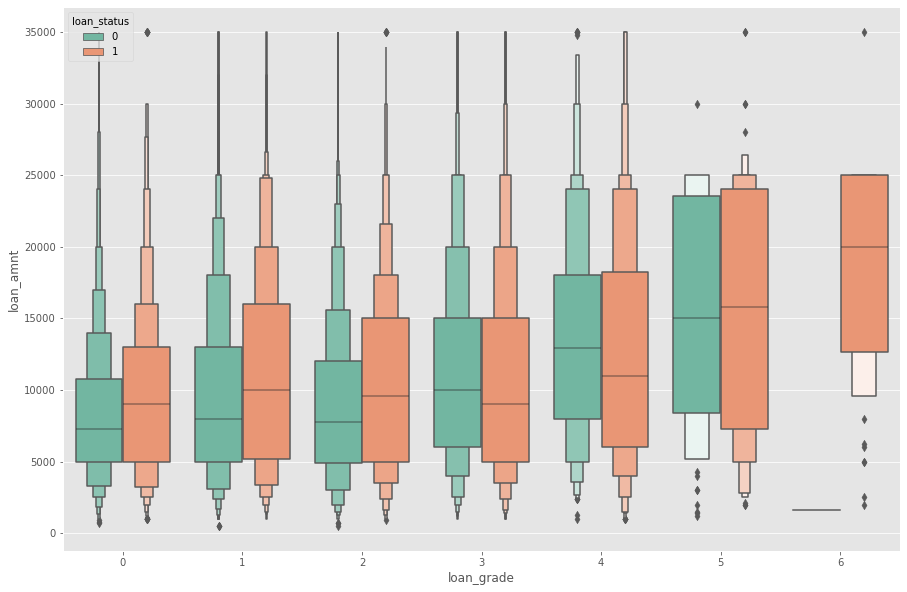

In [164]:
fig = plt.figure(figsize=(15,10))
sns.boxenplot(data = credit_risk, x='loan_grade', y='loan_amnt', hue='loan_status', palette = 'Set2')

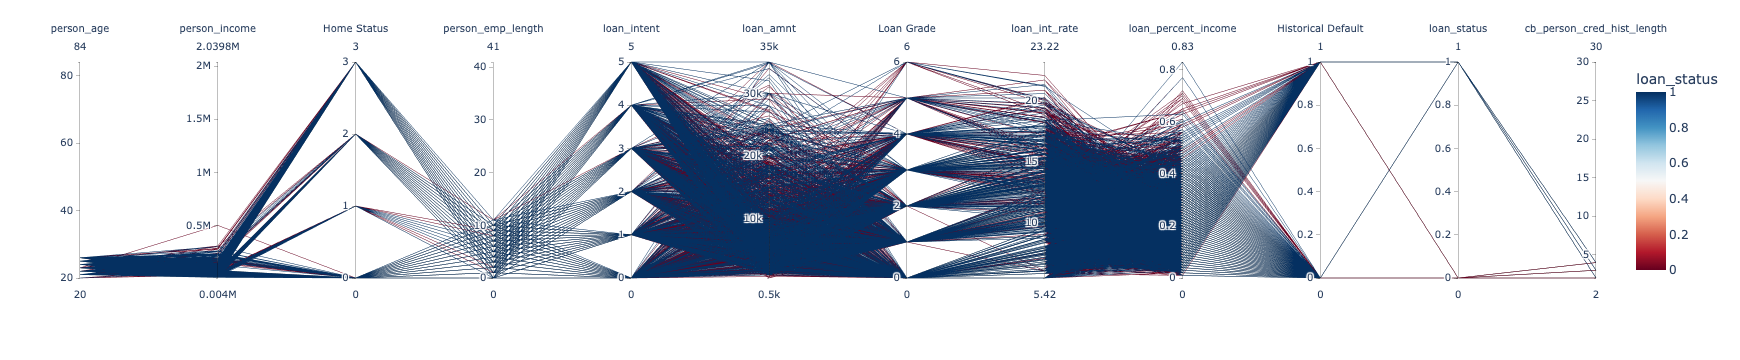

In [166]:
import plotly.express as px
fig = px.parallel_coordinates(credit_risk, color="loan_status", labels={"person_home_ownership": "Home Status",
                "loan_intent": "loan_intent", "cb_person_default_on_file": "Historical Default", "loan_grade": "Loan Grade"},
                            color_continuous_scale=px.colors.diverging.RdBu,
                            color_continuous_midpoint=0.5)
fig.show()

In [217]:
from sklearn.model_selection import train_test_split

# Création de la variable dépendante Y
Y = credit_risk_copy.loan_status ########### pandas.core.series.Series
# Création de la variable indépendante X
X = credit_risk_copy.drop('loan_status', axis=1) ##### pandas.core.frame.DataFrame

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size = 0.20)

In [219]:
print('Dimension de X_train:' + str(X_train.shape))
print('Dimension de X_test:' + str(X_test.shape))
print('Dimension de y_train:' + str(y_train.shape))
print('Dimension de y_test:' + str(y_test.shape))

Dimension de X_train:(22905, 11)
Dimension de X_test:(5727, 11)
Dimension de y_train:(22905,)
Dimension de y_test:(5727,)


In [220]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score
classifier = KNeighborsClassifier(n_neighbors = 50) # Sélectionne le nombre de plus grands voisins K
classifier.fit(X_train, y_train) # On fit le modèle pour trouver les estimateurs avec l'échantillon d'entraînement 
y_pred = classifier.predict(X_test)

In [221]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[4306,  182],
       [ 722,  517]])

Train Accuracy:1.0
Train Accuracy:0.9081423270028378
Train Accuracy:0.9026413446845667
Train Accuracy:0.8784981445099324
Train Accuracy:0.878148875791312
Train Accuracy:0.8681074001309758
Train Accuracy:0.868282034490286
Train Accuracy:0.8633922724296005
Train Accuracy:0.8621261733246016
Train Accuracy:0.8593320235756385


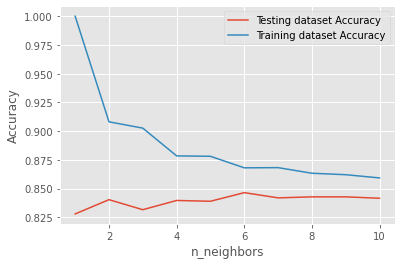

In [253]:
neighbors = np.arange(1, 11) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
  
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 
    print("Train Accuracy:" +str(train_accuracy[i]))
  
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.grid(True, lw=1)
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

In [223]:
classifier.score(X_train, y_train) 

0.8406461471294477

In [224]:
credit_risk.groupby('loan_status').mean()

person_age  person_income  person_home_ownership  \
loan_status                                                     
0             27.785154   70953.827463               1.523451   
1             27.448081   50053.105127               2.249436   

             person_emp_length  loan_intent  loan_grade     loan_amnt  \
loan_status                                                             
0                     4.963843     2.589969    0.994383   9278.136424   
1                     4.116575     2.318446    2.073363  11019.485650   

             loan_int_rate  loan_percent_income  cb_person_default_on_file  \
loan_status                                                                  
0                10.463519             0.148263                   0.141596   
1                13.123509             0.246256                   0.310545   

             cb_person_cred_hist_length  
loan_status                              
0                              5.826616  
1                              5.673976

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

logit = LogisticRegression().fit(X_train, y_train)
y_pred = logit.predict(X_test)

In [232]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      5437
           1       0.18      0.76      0.29       290

    accuracy                           0.81      5727
   macro avg       0.58      0.79      0.59      5727
weighted avg       0.94      0.81      0.86      5727



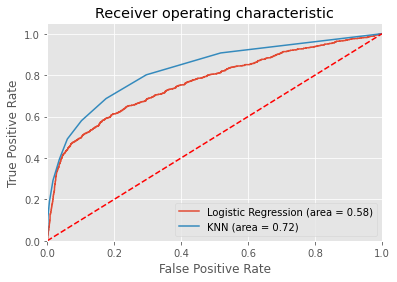

In [243]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logit.predict(X_test))
knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr,tpr, thresholds = roc_curve(y_test, logit.predict_proba(X_test)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr2, tpr2, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [280]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_model = LDA().fit(X_train, y_train)
y_pred = lda_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [281]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      4857
           1       0.49      0.70      0.57       870

    accuracy                           0.84      5727
   macro avg       0.72      0.78      0.74      5727
weighted avg       0.87      0.84      0.85      5727



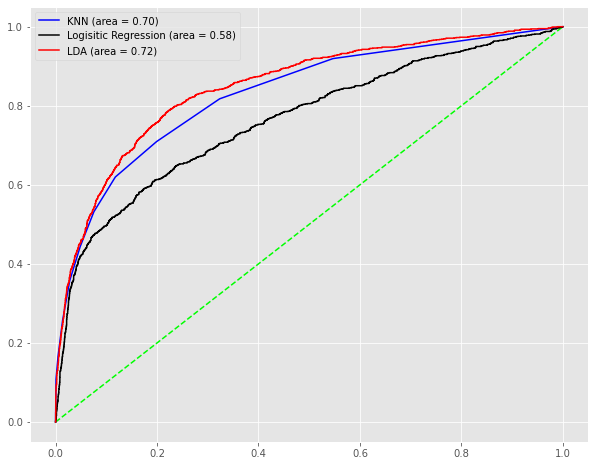

In [295]:
from sklearn.metrics import roc_auc_score, roc_curve

knn_roc_auc_score = roc_auc_score(y_test, knn.predict(X_test))
logit_roc_auc_score = roc_auc_score(y_test, logit.predict(X_test))
lda_roc_auc_score = roc_auc_score(y_test, lda_model.predict(X_test))

fpr, tpr, threshold = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
fpr2, tpr2, threshold2 = roc_curve(y_test, logit.predict_proba(X_test)[:,1])
fpr3, tpr3, threshold3 = roc_curve(y_test, lda_model.predict_proba(X_test)[:,1])

fig = plt.figure(figsize=(10,8))
plt.style.use('ggplot')
plt.plot([0,1],[0,1], '--', color='lime')
plt.plot(fpr, tpr, label = 'KNN (area = %0.2f)' % knn_roc_auc_score, color='blue')
plt.plot(fpr2, tpr2, label = 'Logisitic Regression (area = %0.2f)' % logit_roc_auc_score, color='black')
plt.plot(fpr3, tpr3, label = 'LDA (area = %0.2f)' % lda_roc_auc_score, color='red')
plt.legend()

In [33]:
name = 'Alexandre'
type(name)
name[0:4] + name[4:]

'Alexandre'

In [43]:
name_new = name.replace('Alexandre', 'Payet')
name_new

'Payet'

In [53]:
name.find('A')


0

In [54]:
int(True)

1

In [55]:
'1'+'2'

'12'

In [56]:
myvar = 'hello'

In [57]:
myvar.upper()

'HELLO'

In [58]:
len(myvar)

5